       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

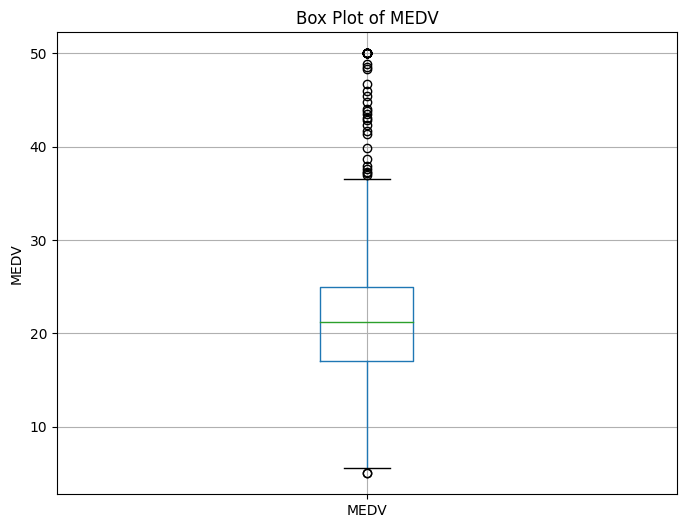

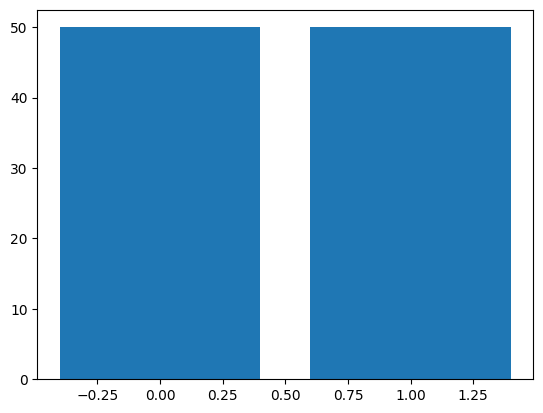

<Figure size 1000x600 with 0 Axes>

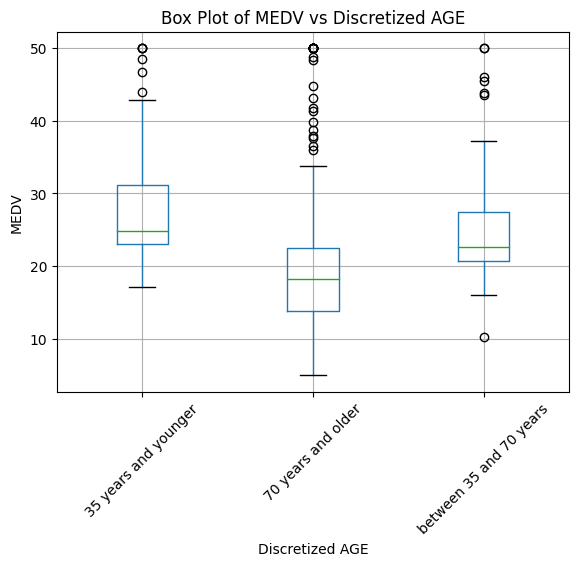

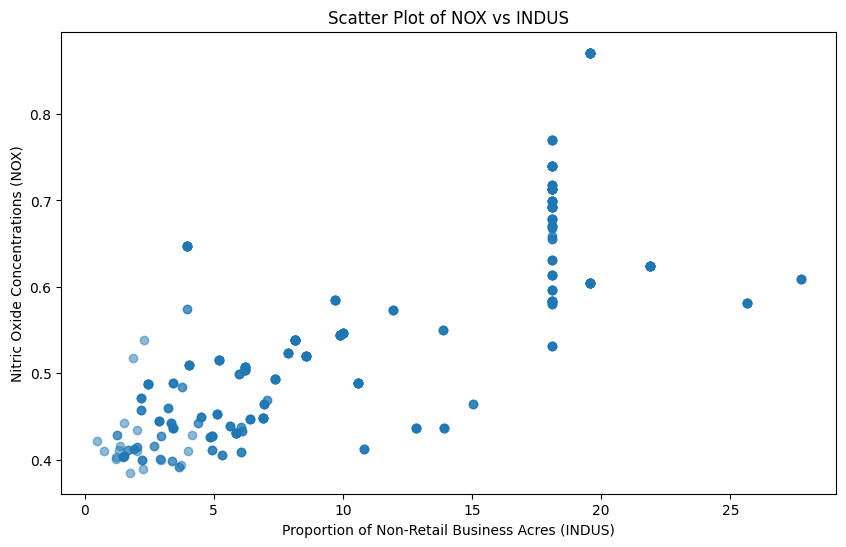

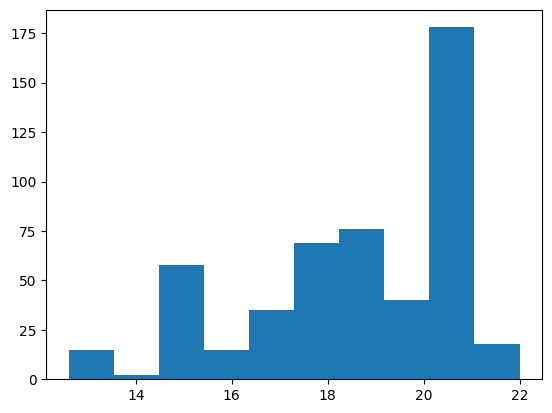

T-statistic: 3.996437466090509
P-value: 7.390623170519902e-05
Reject the null hypothesis: There is a significant difference in median house values.
F-statistic: 0.9840091646131598
P-value: 0.5539698276810188
Fail to reject the null hypothesis: There is no significant difference in median house values across AGE groups.
Pearson Correlation Coefficient: 0.7636514469209157
P-value: 7.913361061236247e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        08:49:23   Log-Likelihood:                -1823.9
No. Observations:                 5

In [8]:
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm



# Task 3 - data loading
# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

try:
    # Read the CSV data from the URL and create a DataFrame
    url_data = pd.read_csv(boston_url)
    boston_df = pd.DataFrame(url_data)
    # Generate summary statistics for the numeric columns in the DataFrame
    summary_stats = boston_df.describe()
    
    # Display the summary statistics
    print(summary_stats)
except Exception as e:
    print("An error occurred:", e)

# task 4 - boxplot for MEDV
column_to_plot = 'MEDV'

# Create a box plot using the chosen column
plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot
boston_df.boxplot(column=column_to_plot)
plt.title(f'Box Plot of {column_to_plot}')
plt.ylabel(column_to_plot)
plt.show()

# Task 4 - Provide a  bar plot for the Charles river variable

categories = boston_df['CHAS']
values = boston_df['MEDV']
grouped_data = boston_df.groupby('CHAS')['MEDV'].mean()


# Create a bar plot
plt.bar(categories, values)
plt.show()

# Task 4 - Boxplot (MEDV and AGE)
def age_discretizer(age):
    if age <= 35:
        return '35 years and younger'
    elif age <= 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

boston_df['Discretized_AGE'] = boston_df['AGE'].apply(age_discretizer)

# Create a box plot
plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='Discretized_AGE')
plt.title('Box Plot of MEDV vs Discretized AGE')
plt.suptitle('')
plt.xlabel('Discretized AGE')
plt.ylabel('MEDV')
plt.xticks(rotation=45)
plt.show()


# Task 4 - Scatter plot ()

plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

# Task 4 - Histogram

plt.hist(boston_df['PTRATIO'])
plt.show()

# Task 5 - Hypothesis test on the MEDV houses bounded by the CHAS
chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_chas_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(chas_bounded, not_chas_bounded)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median house values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median house values.")

# Task 5 ANOVA test MEDV vs AGE
age_groups = boston_df.groupby('AGE')['MEDV'].mean()

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['MEDV'] for name, group in boston_df.groupby('AGE')])

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median house values across AGE groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median house values across AGE groups.")

# Task 5 - Pearson Correlation

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")

# Task 5 - Regeression Analysis

X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())